In [8]:
print("Start import software module")
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation
from keras.layers.convolutional import Convolution2D
from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
#import pickle
#import random
import pandas as pd
import numpy as np
import tensorflow as tf
#import sklearn
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
#from tensorflow.contrib.layers import flatten
print("Finish software module")

Start import software module
Finish software module


In [39]:
# Load datadata
print("Start data loading")
# need to revise on OSU OSC
features_directory = './training_data/'
labels_file= './training_data/driving_log.csv'
#define the input image shape
row = 66
col = 200
ch = 3 
## split the data into 80% training, 20% validation
n_ep = 0

with open(labels_file, mode='r') as f:
    
    reader = csv.reader(f, delimiter=',')
    next(reader, None)  # skip the headers
    for row in reader:
        print(row[3].strip())
        n_ep = n_ep + 1
n_ep = n_ep - 1        
print('the number of epoch is ', n_ep)    
arr = np.arange(n_ep)
np.random.shuffle(arr)
t = arr[:int(n_ep * 0.8)]
v = arr[int(n_ep * 0.8):]
print("the number of training sample ", len(t))
print("the number of validatoin sample ", len(v))

Start data loading
steering
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0617599
0.05219137
0.05219137
0.3679529
0.5784606
0.5784606
0.1670138
0
0
0
0
0
0
0
0
0
0
0
0.08089697
0.0904655
0.0904655
0.1574452
0.1765823
0.1765823
0
0
0
-0.0787459
-0.0787459
-0.0787459
-0.0787459
0
0
0
0
0.05219137
0.05219137
0.0904655
0.38709
0.3583844
0.05219137
0
0
0
0
0
-0.03127411
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.05975719
-0.04076847
0
0
0.01391724
0.01391724
0.01391724
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.01391724
0.1287396
0.2148564
0.2148564
0
0
0
0
0
-0.08824026
-0.2306556
-0.2306556
-0.1547008
-0.0787459
0
0
0.04262284
0.1574452
0.1478767
0.1765823
0.2531306
0
0
-0.135712
-0.2781274
-0.3255992
-0.2591387
0
0
0.03305431
0.04262284
0.0904655
0.1574452
0.243562
0.2626991
0.2626991
0.2626991
0
0
0
0
0
0
-0.06925154
-0.06925154
-0.06925154
-0.06925154
-0.05975719
0
0
0
0

In [23]:
#define some functions

def bright_augment(img):
    img1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    #print(random_bright)
    #print(img1[:,:,2])
    img1[:,:,2] = img1[:,:,2]*random_bright
    img1 = cv2.cvtColor(img1,cv2.COLOR_HSV2RGB)
    return img1

def chop_image(img):
    n_row,n_col, n_ch = img.shape
    # This removes most of the area above the road and small amount below including the hood
    img1 = img[int(n_row * 0.33):int(n_row * 0.875), :]
    return img1
    
def resize_image(img):
    img1 = cv2.resize(img, (200,66), interpolation=cv2.INTER_AREA)
    return img1


def read_image(file_name):
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = bright_augment(img)
    return img

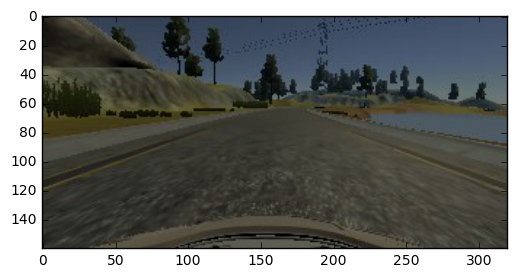

In [29]:
#visuization
image_index = np.random.randint(len(t))
#image_index = 0
df=pd.read_csv(labels_file, sep=',',header=None)
#center camera
camera_index = 0
features_file = features_directory + df[camera_index][image_index].strip()
img = read_image(features_file)
plt.figure(1)
plt.imshow(img)


#flip_img = cv2.flip(img,1)
#plt.figure(2)
#plt.imshow(flip_img)


